# Hackathon

**1.)** From the data that Dr. Panchevski collected, he wants to conclude whether a
specific medicine given to patients helps recovery. The patients include in the trial have
an elevated blood pressure (BP) (data represents only the systolic BP) and it is
assumed that the medicine helps patients stabilize their elevated BP.

Data is collected for 100 patients, and are given in the file named “Prva_zadaca.csv”.
The column ‘Merenje 1’ (english ‘Measure 1) represents measured BP on the first day
of the trial.
The column ‘Merenje 2’ (english ‘Measure 2) represents measured BP after 6 months in
the trial.
The column ‘Primil lek ili ne’ (english ‘Has medicine administered or not’) is categorical
(0 or 1), i.e. it tells us whether a patient has taken the medicine, or not, for lowering the
BP.

a) Decide which way you will visualize the data and write comments about the data
(short text and comments for the plots).

b) Categorize the data and perform Descriptive Statistics for the variables that are
gained.

c) Perform the following tests for the groups:

* c-1) Conclude whether there is a significant difference between BP measured on the first day and BP measured on the last day.

* c-2) Conclude whether there is a significant reduction (or increase) of the BP, in patients that have taken the medicine, between the first measure and after 6 months.      

* c-3) Conclude whether there is a significant reduction (or increase) of the BP, in patients that have not taken the medicine, between the first measure and after 6 months.

* c-4) Is there significant difference in BP between patients that have taken the medicine and patients that have not taken the medicine?    

In [15]:
#Laoding libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import skew 
from scipy.stats import shapiro
from scipy.stats import ks_2samp
from scipy.stats import ks_1samp

In [16]:
# Load the data from file:
df = pd.read_csv('Prva_zadaca.csv')
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
df.set_index('Index', inplace=True)
df

,Merenje 1,Merenje 2,Primil lek ili ne
Index,,,
0,151.354987,128.022177,1
1,140.893229,142.951676,0
2,149.398011,123.352114,1
3,145.447638,144.392613,0
4,146.130695,111.255393,1
...,...,...,...
95,171.349918,176.539961,0
96,137.475245,117.997604,1
97,162.832752,165.922771,0


In [17]:
#Checking if there is missing values:
missing_values = df.isnull().any(axis=1).sum()
print('missing values =', missing_values) 

missing values = 0


### a) Visualizing the data

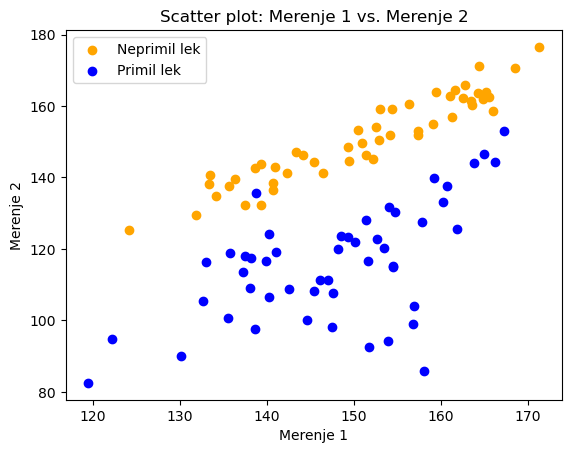

In [18]:
#Scatter plot
merenje_1 = df['Merenje 1']
merenje_2 = df['Merenje 2']
primil_lek_ili_ne = df['Primil lek ili ne']

plt.scatter(merenje_1[primil_lek_ili_ne == 0], merenje_2[primil_lek_ili_ne == 0], c='orange', label='Neprimil lek')
plt.scatter(merenje_1[primil_lek_ili_ne == 1], merenje_2[primil_lek_ili_ne == 1], c='blue', label='Primil lek')

plt.xlabel('Merenje 1')
plt.ylabel('Меrenje 2')
plt.title('Scatter plot: Merenje 1 vs. Merenje 2')  
plt.legend()

plt.show()

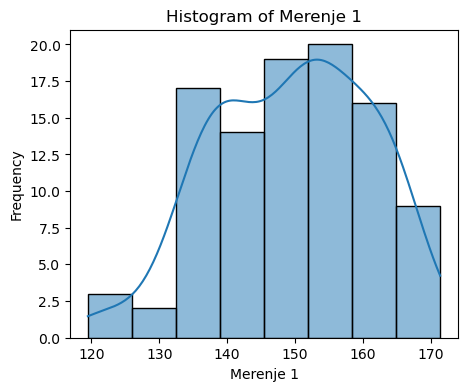

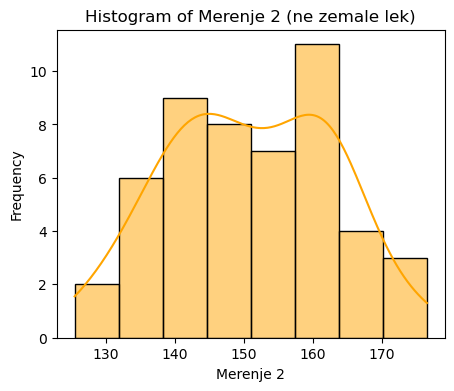

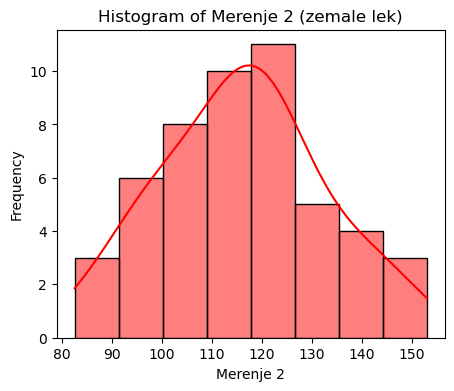

In [19]:
#Histograms
# Plot histogram for "Merenje 1"
plt.figure(figsize=(5, 4))
sns.histplot(df['Merenje 1'], bins=8, kde=True)
plt.title('Histogram of Merenje 1')
plt.xlabel('Merenje 1')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for "Merenje 2 kade ne zemale lek"
plt.figure(figsize=(5, 4))
sns.histplot(df[df['Primil lek ili ne'] == 0]['Merenje 2'], bins=8, kde=True, color='orange')
plt.title('Histogram of Merenje 2 (ne zemale lek)')
plt.xlabel('Merenje 2')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for "Merenje 2 kade zemale lek"
plt.figure(figsize=(5, 4))
sns.histplot(df[df['Primil lek ili ne'] == 1]['Merenje 2'], bins=8, kde=True, color='red')
plt.title('Histogram of Merenje 2 (zemale lek)')
plt.xlabel('Merenje 2')
plt.ylabel('Frequency')
plt.show()

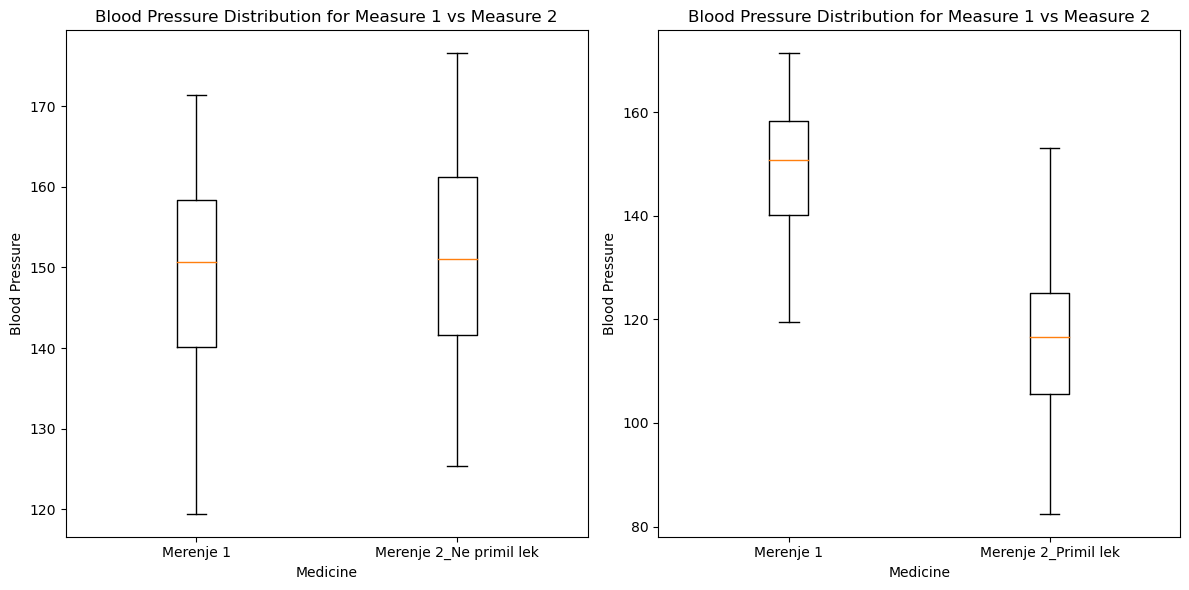

In [20]:
#Box plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].boxplot([df['Merenje 1'],
                 df[df['Primil lek ili ne'] == 0]['Merenje 2']],
                labels=['Merenje 1', 'Merenje 2_Ne primil lek'])
axes[0].set_title('Blood Pressure Distribution for Measure 1 vs Measure 2')
axes[0].set_xlabel('Medicine')
axes[0].set_ylabel('Blood Pressure')

axes[1].boxplot([df['Merenje 1'], df[df['Primil lek ili ne'] == 1]['Merenje 2']],
                labels=['Merenje 1', 'Merenje 2_Primil lek'])
axes[1].set_title('Blood Pressure Distribution for Measure 1 vs Measure 2')
axes[1].set_xlabel('Medicine')
axes[1].set_ylabel('Blood Pressure')

plt.tight_layout()  
plt.show()

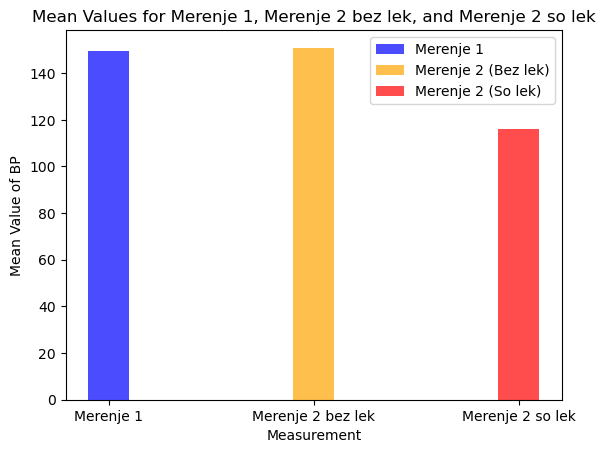

<Figure size 800x600 with 0 Axes>

In [21]:
mean_merenje_1 = df['Merenje 1'].mean()
mean_merenje_2_no_lek = df[df['Primil lek ili ne'] == 0]['Merenje 2'].mean()
mean_merenje_2_lek = df[df['Primil lek ili ne'] == 1]['Merenje 2'].mean()

fig, ax = plt.subplots()

colors = ['blue', 'orange', 'red']
bar_width = 0.2
positions = [1, 2, 3]
heights = [mean_merenje_1, mean_merenje_2_no_lek, mean_merenje_2_lek]


ax.bar(positions[0], heights[0], color=colors[0], width=bar_width, alpha=0.7, label='Merenje 1')

ax.bar(positions[1], heights[1], color=colors[1], width=bar_width, alpha=0.7, label='Merenje 2 (Bez lek)')

ax.bar(positions[2], heights[2], color=colors[2], width=bar_width, alpha=0.7, label='Merenje 2 (So lek)')


ax.set_xticks(positions)
ax.set_xticklabels(['Merenje 1', 'Merenje 2 bez lek', 'Merenje 2 so lek'])
ax.set_title('Mean Values for Merenje 1, Merenje 2 bez lek, and Merenje 2 so lek')
ax.set_xlabel('Measurement')
ax.set_ylabel('Mean Value of BP')


ax.legend()
plt.figure(figsize=(8, 6))
plt.tight_layout()
plt.show()

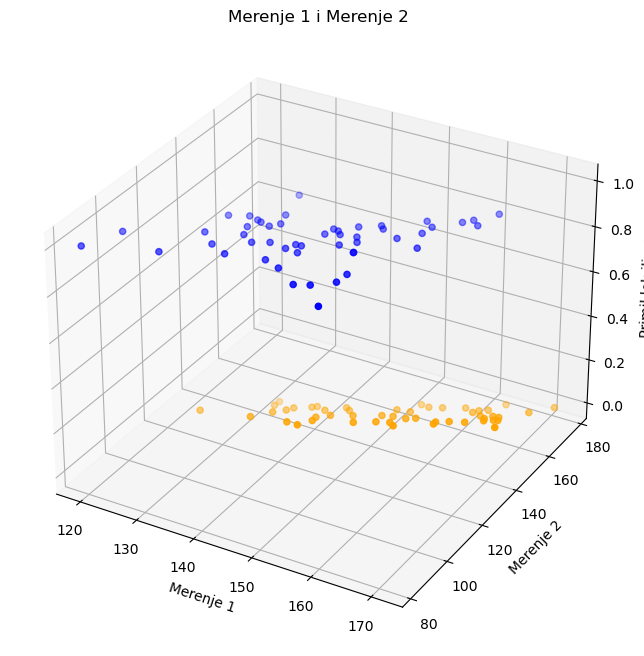

In [22]:
#3D plot
df_z1_0 = df[df['Primil lek ili ne']==0]
df_z1_1 = df[df['Primil lek ili ne']==1]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xs0 = df_z1_0['Merenje 1']
ys0 = df_z1_0['Merenje 2']
zs0 = df_z1_0['Primil lek ili ne']
ax.scatter(xs0, ys0, zs0, marker='o', color='orange')

xs1 = df_z1_1['Merenje 1']
ys1 = df_z1_1['Merenje 2']
zs1 = df_z1_1['Primil lek ili ne']
ax.scatter(xs1, ys1, zs1, marker='o', color='blue')

ax.set_xlabel('Merenje 1')
ax.set_ylabel('Merenje 2')
ax.set_zlabel('Primil lek ili ne')

plt.title('Merenje 1 i Merenje 2')
plt.show()

#### Comments for the visualized data

From the visualizations we can conclude that 'Merenje 1' is showing generally higher values than 'Merenje 2'. That the data, especally the histograms for 'Merenje 1' and 'Merenje 2 (ne zemale lek)' the isn't a specific distiribution, but the hisogram for 'Merenje 2 (zemale lek)' is somewhat normally distribuded, but for this conclusion to be true we are going to make added analysis. Through the box plots it can be seen that there is not outliers in the data samples. And as a last comment all these observations could indicate that 'Merenje 1' might be a more sensitive health indicator, or it could be influenced by other factors like the timing of the measurements or the patients' health conditions at that particular moment.that medication might have a positive impact on these health measurements, but further analysis and statistical testing are required to establish a causal relationship.

### b) Descriptive statistics (Five Number Summary)

In [23]:
#For 'Merenje 1'
minimum_1 = df['Merenje 1'].min()
quartiles_1 = df['Merenje 1'].quantile([0.25, 0.5, 0.75])
maximum_1= df['Merenje 1'].max()

print("Five-Number-Summary:")
print()
print("Minimum:", minimum_1)
print("25th Percentile:", quartiles_1[0.25])
print("Median:", quartiles_1[0.5])
print("75th Percentile:", quartiles_1[0.75])
print("Maximum:", maximum_1)


# Calculate the skewness coefficient
skewness_1 = skew(df['Merenje 1'])
print("Skewness Coefficient:", skewness_1)
print()

# Calculate the interquartile range (IQR)
Q1 = quartiles_1[0.25]
Q3 = quartiles_1[0.75]
IQR = Q3 - Q1

# Determine the lower bound and upper bound for outliers
lower_bound, upper_bound  = Q1 - 1.5 * IQR,  Q3 + 1.5 * IQR

# Identify and list the outliers
outliers = df['Merenje 1'][(df['Merenje 1'] < lower_bound) | (df['Merenje 1'] > upper_bound)]
if not outliers.empty:
    print("Outliers:")
    print(outliers)
else:
    print("There are no outliers.")

Five-Number-Summary:

Minimum: 119.48883255549268
25th Percentile: 140.14954356294868
Median: 150.7087284185807
75th Percentile: 158.3172018979418
Maximum: 171.34991848225175
Skewness Coefficient: -0.2706194623823519

There are no outliers.


In [24]:
#For 'Merenje 2'
minimum_2 = df['Merenje 2'].min()
quartiles_2 = df['Merenje 2'].quantile([0.25, 0.5, 0.75])
maximum_2= df['Merenje 2'].max()

print("Five-Number-Summary:")
print()
print("Minimum:", minimum_2)
print("25th Percentile:", quartiles_2[0.25])
print("Median:", quartiles_2[0.5])
print("75th Percentile:", quartiles_1[0.75])
print("Maximum:", maximum_2)


# Calculate the skewness coefficient
skewness_2= skew(df['Merenje 2'])
print("Skewness Coefficient:", skewness_2)
print()

# Calculate the interquartile range (IQR)
Q1 = quartiles_2[0.25]
Q3 = quartiles_2[0.75]
IQR = Q3 - Q1


# Determine the lower bound and upper bound for outliers
lower_bound, upper_bound  = Q1 - 1.5 * IQR,  Q3 + 1.5 * IQR

# Identify and list the outliers
outliers = df['Merenje 2'][(df['Merenje 2'] < lower_bound) | (df['Merenje 2'] > upper_bound)]
if not outliers.empty:
    print("Outliers:")
    print(outliers)
else:
    print("There are no outliers.")

Five-Number-Summary:

Minimum: 82.50592531837464
25th Percentile: 116.70488466238825
Median: 137.01107452776515
75th Percentile: 158.3172018979418
Maximum: 176.53996146912212
Skewness Coefficient: -0.2633673749381793

There are no outliers.


In [25]:
#Range, Variance and standard deviation

#Range
print(f'The range for Merenje 1 is {maximum_1-minimum_1}. ')
print(f'The range for Merenje 2 is {maximum_2-minimum_2}. ')
print('')

#Variance
variance_merenje_1 = df['Merenje 1'].var()
variance_merenje_2_primil_lek = df[df['Primil lek ili ne'] == 1]['Merenje 2'].var()
variance_merenje_2_ne_primil_lek = df[df['Primil lek ili ne'] == 0]['Merenje 2'].var()

print("Variance for Merenje 1:", variance_merenje_1)
print("Variance for Merenje 2 - Patients who received medication:", variance_merenje_2_primil_lek)
print("Variance for Merenje 2 - Patients who did not receive medication:", variance_merenje_2_ne_primil_lek)

print(' ')

#Standard deviation
standard_deviation_1 = df['Merenje 1'].std()
print('Standard Deviation for Merenje 1 =', standard_deviation_1)
standard_deviation_2_primil_lek = df[df['Primil lek ili ne'] == 1]['Merenje 2'].std()
print('Standard_ Deviation for Merenje 2 - Patients who received medication:" =', standard_deviation_2_primil_lek)
standard_deviation_2_ne_primil_lek = df[df['Primil lek ili ne'] == 0]['Merenje 2'].std()
print('Standard Deviation for Merenje 2 - Patients who did not receive medication:" =', standard_deviation_2_ne_primil_lek)

The range for Merenje 1 is 51.861085926759074. 
The range for Merenje 2 is 94.03403615074748. 

Variance for Merenje 1: 130.9272725963022
Variance for Merenje 2 - Patients who received medication: 265.2486096851631
Variance for Merenje 2 - Patients who did not receive medication: 142.29974514191463
 
Standard Deviation for Merenje 1 = 11.442345589795048
Standard_ Deviation for Merenje 2 - Patients who received medication:" = 16.28645479179441
Standard Deviation for Merenje 2 - Patients who did not receive medication:" = 11.928945684423022


#### Conclusion:

In conclusion, this descriptive statistics analysis provides a preliminary overview of the health measurements
and medication response for the given patient group. The data highlights potential patterns and relationships,
suggesting that medication might have a positive effect on health measurements. This analysis serves as a starting point for deeper research and lays the foundation for a more comprehensive understanding of the patients' health and medication outcomes.

### c) Performing tests

#### Shapiro-Wilk normality test:
Shapiro-Wilk test is a hypothesis test that evaluates whether a data set is normally distributed. It evaluates data from a sample with the null hypothesis that the data set is normally distributed. A large p-value indicates the data set is normally distributed, a low p-value indicates that it isn’t normally distributed.

In [26]:
# Perform Shapiro-Wilk test for 'Merenje 1' column
sample_0 = df['Merenje 1']
statistic_0, p_value_0 = stats.shapiro(sample_0)
print("Merenje 1 - p_value =", p_value_0)

# Perform Shapiro-Wilk test for the sample where 'Primil lek ili ne' is 0 and 'Merenje 2' column
sample_1= df[df['Primil lek ili ne'] == 0]['Merenje 2']
statistic_1, p_value_1 = stats.shapiro(sample_1)
print("Merenje 2 kade ne primil lek - p_value =", p_value_1)

# Perform Shapiro-Wilk test for the sample where 'Primil lek ili ne' is 1 and 'Merenje 2' column
sample_2 = df[df['Primil lek ili ne'] == 1]['Merenje 2']
statistic_2, p_value_2 = stats.shapiro(sample_2)
print("Merenje 2 kade primil lek is 1 - p_value =", p_value_2)

# Perform Shapiro-Wilk test for the whole 'Merenje 2' column
sample_3 = df['Merenje 2']
statistic_3, p_value_3 = stats.shapiro(sample_3)
print("Merenje 2 - p_value =", p_value_3)


Merenje 1 - p_value = 0.06573477387428284
Merenje 2 kade ne primil lek - p_value = 0.5691301226615906
Merenje 2 kade primil lek is 1 - p_value = 0.9613175988197327
Merenje 2 - p_value = 0.04139488935470581


The sample from the second measurement, when considering it separately for patients who took the medicine
and patients who did not take the medicine, also follows a normal distribution.
Even though, when considering the first sample and the second sample as a whole has shown that they don't have a normal distirbution, in further T-tests, it is not entirely true.

#### Performing the two-sample T-tests

2.120577881732855e-09
Reject H0 in favor of Ha
There is a significant difference between BP measured on the first day and BP measured on the last day.


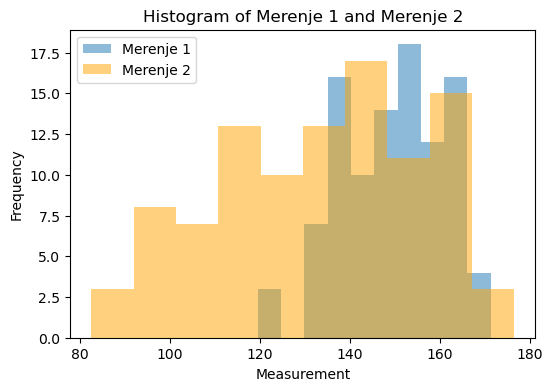

Merenje 1 mean_value: 149.38304721420002
Merenje 2 mean_value: 133.5344185369816


In [27]:
'''c1)'''
# Extract the 'Merenje 1' and 'Merenje 2' columns as NumPy arrays
merenje_1 = df['Merenje 1'].values
merenje_2 = df['Merenje 2'].values


# H0 : mu1 = mu2
# Ha : mu1 =/= mu2

#Finding p_value
_, p_value = stats.ttest_ind(merenje_1, merenje_2, alternative='two-sided')

print(p_value)

if p_value <= 0.05:
    print('Reject H0 in favor of Ha')
    print('There is a significant difference between BP measured on the first day and BP measured on the last day.')
else:
    print('Accept H0')
    print('There is no significant difference between BP measured on the first day and BP measured on the last day.')

#Visualization 
plt.figure(figsize=(6, 4))
plt.hist(merenje_1, alpha=0.5, label='Merenje 1')
plt.hist(merenje_2, alpha=0.5, color='orange', label='Merenje 2')
plt.legend()
plt.xlabel('Measurement')
plt.ylabel('Frequency')
plt.title('Histogram of Merenje 1 and Merenje 2')
plt.show()

print("Merenje 1 mean_value:", merenje_1.mean())
print("Merenje 2 mean_value:", merenje_2.mean())

p_value = 8.593960502879443e-20
Reject null hypothesis.
There is a significant reduction in BP for patients who have taken the medicine between the first measure and after 6 months.


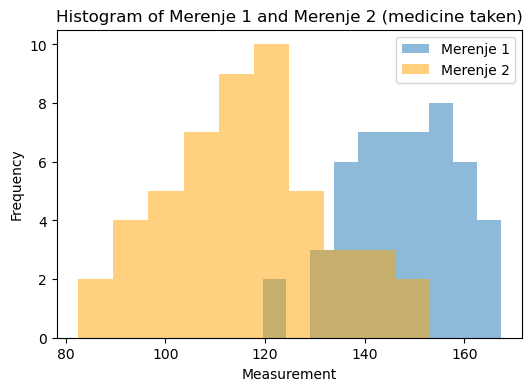

Merenje 1 mean_value: 147.65543252687047
Merenje 2 mean_value: 116.17033104000187


In [28]:
'''c2)'''
merenje_1_primil_lek = df[df['Primil lek ili ne'] == 1]['Merenje 1'].values
merenje_2_primil_lek = df[df['Primil lek ili ne'] == 1]['Merenje 2'].values

# H0 : mu1 = mu2
# Ha : mu1 > mu2

#Finding p_value
_, p_value = stats.ttest_ind(merenje_1_primil_lek, merenje_2_primil_lek, alternative='greater')

print('p_value =', p_value)

if p_value <= 0.05:
    print('Reject null hypothesis.')
    print ('There is a significant reduction in BP for patients who have taken the medicine between the first measure and after 6 months.')
else:
    print('Accept null hypothesis')
    print('There is no significant reduction in BP for patients who have taken the medicine between the first measure and after 6 months.')

#Visualization 
plt.figure(figsize=(6, 4))
plt.hist(merenje_1_primil_lek, alpha=0.5, label='Merenje 1')
plt.hist(merenje_2_primil_lek, alpha=0.5, color='orange', label='Merenje 2')
plt.legend()
plt.xlabel('Measurement')
plt.ylabel('Frequency')
plt.title('Histogram of Merenje 1 and Merenje 2 (medicine taken)')
plt.show()

print("Merenje 1 mean_value:", merenje_1_primil_lek.mean())
print("Merenje 2 mean_value:", merenje_2_primil_lek.mean())

p_value = 0.4643120680501002
Accept the null hypothesis.
There is no significant increase in BP for patients who have not taken the medicine between the first measure and after 6 months.


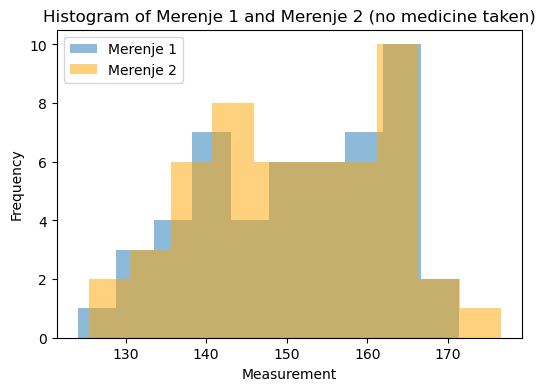

Merenje 1 mean_value: 151.1106619015295
Merenje 2 mean_value: 150.89850603396133


In [29]:
'''c3)'''
merenje_1_ne_primil_lek = df[df['Primil lek ili ne'] == 0]['Merenje 1'].values
merenje_2_ne_primil_lek = df[df['Primil lek ili ne'] == 0]['Merenje 2'].values

# H0 : mu1 = mu2
# Ha : mu1 < mu2

#Finding p_value
_, p_value = stats.ttest_ind(merenje_1_ne_primil_lek, merenje_2_ne_primil_lek, alternative='greater')

print('p_value =', p_value)

if p_value <= 0.05:
    print('Reject the null hypothesis.')
    print('There is a significant increase in BP for patients who have taken the medicine between the first measure and after 6 months.')
else:
    print('Accept the null hypothesis.')
    print('There is no significant increase in BP for patients who have not taken the medicine between the first measure and after 6 months.')

#Visualization 
plt.figure(figsize=(6, 4))
plt.hist(merenje_1_ne_primil_lek, alpha=0.5, label='Merenje 1')
plt.hist(merenje_2_ne_primil_lek, alpha=0.5, color='orange', label='Merenje 2')
plt.legend()
plt.xlabel('Measurement')
plt.ylabel('Frequency')
plt.title('Histogram of Merenje 1 and Merenje 2 (no medicine taken)')
plt.show()

print("Merenje 1 mean_value:", merenje_1_ne_primil_lek.mean())
print("Merenje 2 mean_value:", merenje_2_ne_primil_lek.mean())

p_value = 2.6924985152089745e-21
Reject the null hypothesis.
There is a significant difference in BP for patients who have taken the medicine between the first measure and after 6 months.


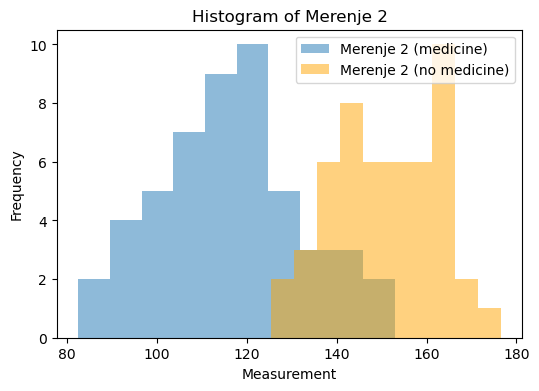

In [30]:
'''c4)'''
#The variables are already difined in the code above

#Finding p_value
_, p_value = stats.ttest_ind(merenje_2_primil_lek, merenje_2_ne_primil_lek, alternative='two-sided')

# H0 : merenje 1 = merenje 2
# Ha : merenje 1 =/= merenje 2

print('p_value =', p_value)

if p_value <= 0.05:
    print('Reject the null hypothesis.')
    print('There is a significant difference in BP for patients who have taken the medicine between the first measure and after 6 months.')
else:
    print('Accept the null hypothesis.')
    print('There is no significant increase in BP for patients who have not taken the medicine between the first measure and after 6 months.')

#Visualization    
plt.figure(figsize=(6, 4))
plt.hist(merenje_2_primil_lek, alpha=0.5, label='Merenje 2 (medicine)')
plt.hist(merenje_2_ne_primil_lek, alpha=0.5, color='orange', label='Merenje 2 (no medicine)')
plt.legend()
plt.xlabel('Measurement')
plt.ylabel('Frequency')
plt.title('Histogram of Merenje 2')
plt.show()

---

**2.)** Dr. Panchevski received a new set of data after the first trial. The parameters of the
    trial were the same, however, the data for whether a patient has taken a medicine in the
    trial or not was lost.

a) Using the data in ‘Prva_zadaca.csv’, construct (train) a classification algorithm for the
   data. Categorize the patients in 2 groups - 0 (did not receive medicine) and 1 (received
   medicine). Then, for the new data in ‘Vtora_zadaca.csv’:

а-1) Categorize patients only with respect to the first measurement.

а-2) Categorize patients only with respect to the second measurement.

а-3) Categorize patients with respect to the first and second measurement.

а-4) For the categorizations in a-1), a-2) and a-3), compare the precision of the
Models, comment (short textual description) and visualize the data (2D / 3D - in
Python, write comments for the plots).

b)
Bonus: Is it possible to categorize the data using linear regression? Would the model
be a good fit? Assuming yes, which columns should be used to train the model in this
case (on the data in ‘Prva_zadaca.csv’? Construct a linear regression for the
categorization tasks for patients in ‘Vtora_zadaca.csv’. What is R2? Can this score be
improved? What does the score depend on in this scenario?

In [31]:
# Load the data
df_train = pd.read_csv('Prva_zadaca.csv')
df_test = pd.read_csv('Vtora_zadaca.csv')

print('Train set:')
display(df_train.head())

print('Test set:')
display(df_test.tail())

Train set:


,Unnamed: 0,Merenje 1,Merenje 2,Primil lek ili ne
0,0,151.354987,128.022177,1
1,1,140.893229,142.951676,0
2,2,149.398011,123.352114,1
3,3,145.447638,144.392613,0
4,4,146.130695,111.255393,1


Test set:


,Unnamed: 0,Merenje 1,Merenje 2
95,95,153.006514,151.003056
96,96,143.406574,150.709426
97,97,151.069090,139.754312
98,98,140.135277,144.363428
99,99,154.120504,149.699120


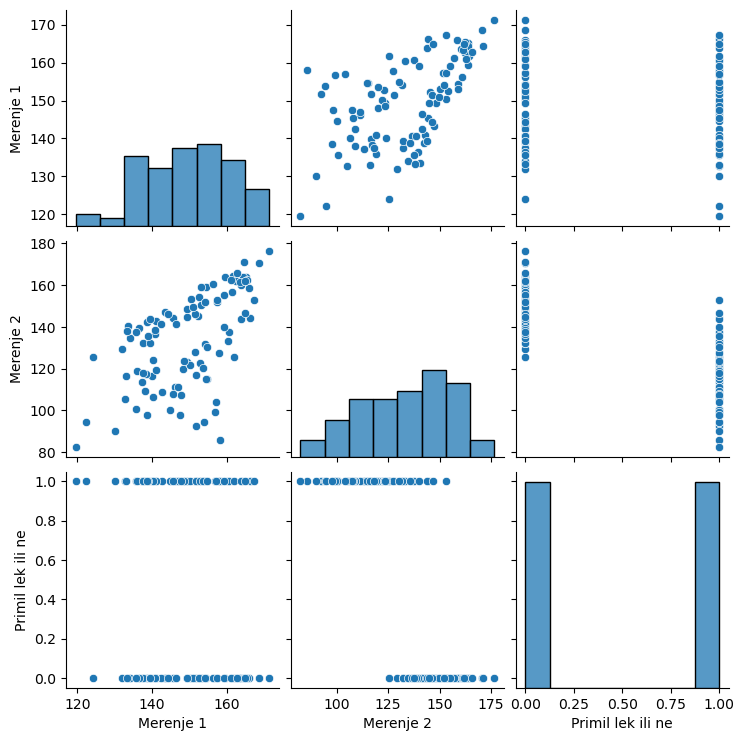

In [32]:
sns.pairplot(df)
plt.show()

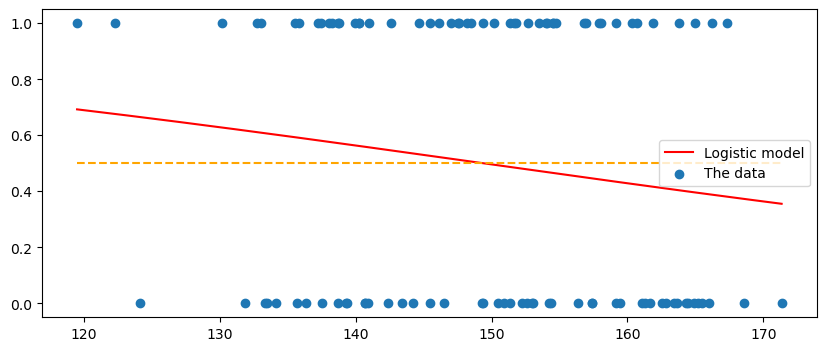

In [33]:
'''a1)'''
# Preparing the data for train and test
X_1 = np.array(df_train['Merenje 1']).reshape(-1,1)
y =  np.array(df_train['Primil lek ili ne'])

# Building the model based on first measurement
model_1 = LogisticRegression()
model_1.fit(X_1,y)

# Visualization:
#plotting data and model on the same graph
xs = np.linspace(min(X_1), max(X_1), 1000)
ys = model_1.predict_proba(xs.reshape(-1, 1))
plt.figure(figsize=(10,4))
plt.plot(xs, ys[:,1], c='r', label='Logistic model')
plt.scatter(X_1, y, label='The data')
plt.hlines(0.5, X_1.min(), X_1.max(), linestyle='--', color='orange')
plt.legend()
plt.show()

Accuracy:  0.56


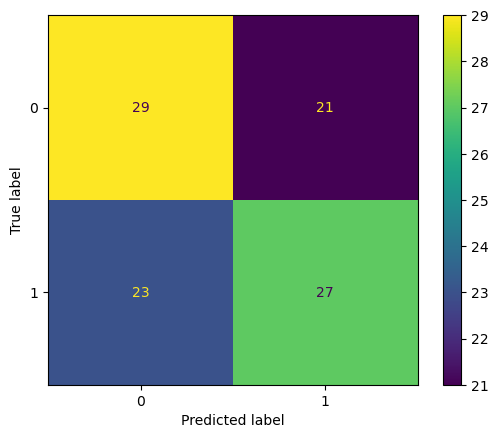

In [34]:
#Creating confusion matrix and finding the accuracy for the model
y_true_1 = df_train['Primil lek ili ne']
y_pred_1 = model_1.predict(X_1)
confusion_matrix_1 = confusion_matrix(y_true_1,y_pred_1)

confusion_matrix_1 = confusion_matrix(y_true_1,y_pred_1)
ConfusionMatrixDisplay(confusion_matrix_1).plot()
print('Accuracy: ', model_1.score((np.array(df_train['Merenje 1']).reshape(-1,1)), df_train['Primil lek ili ne']))

In [35]:
df_test['Target from Merenje 1'] = y_pred_1

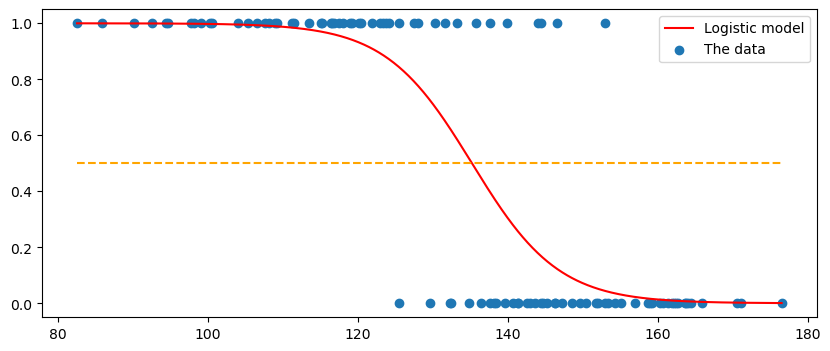

In [36]:
'''a2)'''
# Preparing the data for train and test
X_2 = np.array(df_train['Merenje 2']).reshape(-1,1)
y =  np.array(df_train['Primil lek ili ne'])

# Building the model based on first measurement
model_2 = LogisticRegression()
model_2.fit(X_2,y)

# Visualization:
#plotting data and model on the same graph
xs = np.linspace(X_2.min(), X_2.max(), 1000)
ys = model_2.predict_proba(xs.reshape(-1, 1))
plt.figure(figsize=(10,4))
plt.plot(xs, ys[:,1], c='r', label='Logistic model')
plt.scatter(X_2, y, label='The data')
plt.hlines(0.5, X_2.min(), X_2.max(), linestyle='--', color='orange')
plt.legend()
plt.show()

Accuracy:  0.88


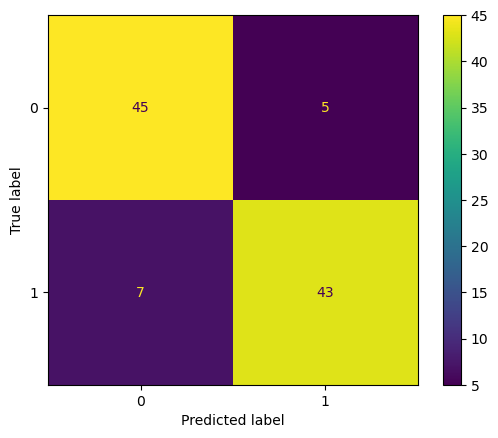

In [37]:
#Creating confusion matrix and finding the accuracy for the model
y_true_2 = df_train['Primil lek ili ne']
y_pred_2 = model_2.predict(X_2)
confusion_matrix_2 = confusion_matrix(y_true_2,y_pred_2)

confusion_matrix_2 = confusion_matrix(y_true_2,y_pred_2)
ConfusionMatrixDisplay(confusion_matrix_2).plot()
print('Accuracy: ', model_2.score((np.array(df_train['Merenje 2']).reshape(-1,1)), df_train['Primil lek ili ne']))

In [38]:
df_test['Target from Merenje 2'] = y_pred_2

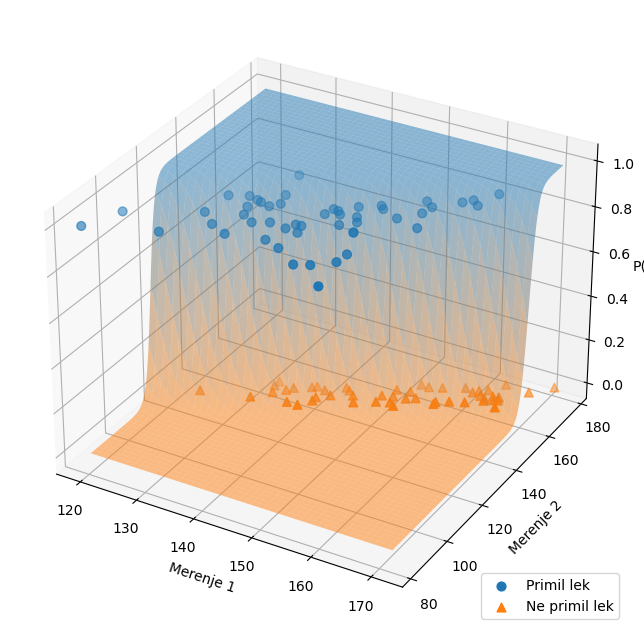

In [39]:
'''a3)'''
# Preparing the data for train and test
X = np.array(df_train[['Merenje 1', 'Merenje 2']])
y = np.array(df_train['Primil lek ili ne'])

# Building the model based on height
model= LogisticRegression().fit(X,y)

# Visualization:
# Color-coding the gender data for the 3D scatter plot
xm = df_train.loc[df_train['Primil lek ili ne'] == 1]['Merenje 1']
ym = df_train.loc[df_train['Primil lek ili ne'] == 1]['Merenje 2']
zm = df_train.loc[df_train['Primil lek ili ne'] == 1]['Primil lek ili ne']

xf = df_train.loc[df_train['Primil lek ili ne'] == 0]['Merenje 1']
yf = df_train.loc[df_train['Primil lek ili ne'] == 0]['Merenje 2']
zf = df_train.loc[df_train['Primil lek ili ne'] == 0]['Primil lek ili ne']

# Creating the surface for the model
xs = np.linspace(X[:,0].min(), X[:,0].max(), 1000)
ys = np.linspace(X[:,1].min(), X[:,1].max(), 1000)
xs, ys = np.meshgrid(xs, ys)

b_0 = model.intercept_[0]
b_h = model.coef_[0][0]
b_w = model.coef_[0][1]
zs = 1/(1 + np.exp(b_0 + b_h*xs + b_w*ys))

from matplotlib.colors import LinearSegmentedColormap
my_cmap = LinearSegmentedColormap.from_list('mycmap', ['tab:orange', 'tab:blue'])

fig = plt.figure(figsize=(8,8))
ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_surface(xs, ys, zs, cmap=my_cmap, alpha=0.5)
ax2.scatter(xm, ym, zm, marker='o', s=40, label = 'Primil lek')
ax2.scatter(xf, yf, zf, marker='^', s=40, label = 'Ne primil lek')
ax2.set_xlabel('Merenje 1')
ax2.set_ylabel('Merenje 2')
ax2.set_zlabel('P(M)')
ax2.legend(loc='lower right')
plt.show()

Accuracy:  0.99


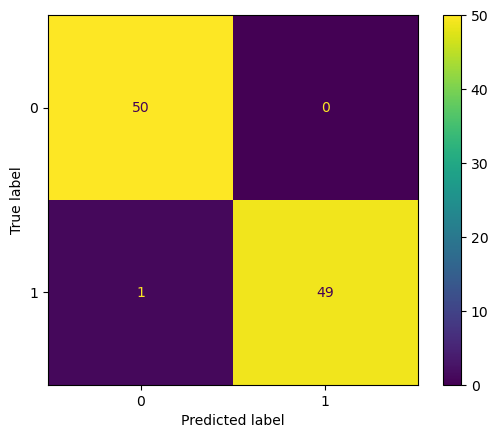

In [40]:
#Creating confusion matrix and finding the accuracy for the model
y_true = df_train['Primil lek ili ne']
y_pred = model.predict(X)
confusion_matrix_all = confusion_matrix(y_true,y_pred)

confusion_matrix_all= confusion_matrix(y_true,y_pred)
ConfusionMatrixDisplay(confusion_matrix_all).plot()
print('Accuracy: ', model.score(np.array(df_train[['Merenje 1', 'Merenje 2']]), df_train['Primil lek ili ne']))

In [41]:
df_test['Target from Merenje 1 i Merenje 2'] = y_pred
df_test

,Unnamed: 0,Merenje 1,Merenje 2,Target from Merenje 1,Target from Merenje 2,Target from Merenje 1 i Merenje 2
0,0,163.419762,156.977602,0,1,1
1,1,154.133336,127.545654,1,0,0
2,2,144.966965,144.371136,1,1,1
3,3,150.545838,150.807626,1,0,0
4,4,153.743813,148.645986,1,1,1
...,...,...,...,...,...,...
95,95,153.006514,151.003056,0,0,0
96,96,143.406574,150.709426,1,1,1
97,97,151.069090,139.754312,0,0,0
98,98,140.135277,144.363428,1,1,1


Because the column 'Primil lek ili ne' is lost in the data set we can'make a evaluation of the model for the sample data. That's way it was made an evaluation for these samples using Logistic Regression.The score model was given by the instructor.

###### Comments: 
* The accuracy of the model regarding 'Merenje 1' column is 56%, with 29% True Negatives and 27% True Positives.
* The accuracy of the model regarding 'Merenje 2 column is 88%, with 45% True Negatives and 43% True Positives.
* The accuracy of the model regarding 'Merenje 1' and 'Merenje 2' columns is 99%, with 50% True Negatives and 49% True Positives.

## Bonus ##
b) **Bonus**: Is it possible to categorize the data using linear regression? Would the model
be a good fit? Assuming yes, which columns should be used to train the model in this
case (on the data in ‘Prva_zadaca.csv’? Construct a linear regression for the
categorization tasks for patients in ‘Vtora_zadaca.csv’. What is R
2? Can this score be
improved? What does the score depend on in this scenario?

To answer the first question it can't be used Linear Regresion to categorize the data, because Linear Regression models are used for predictions not qualifications.Following this, the model **would not be a GOOD FIT**.

Assuming that we could find a good fit model using Linear Regression, the column  which would be used for the first data set is the difference between 'Merenje 1' and 'Merenje 2' as can be seen in the code below.

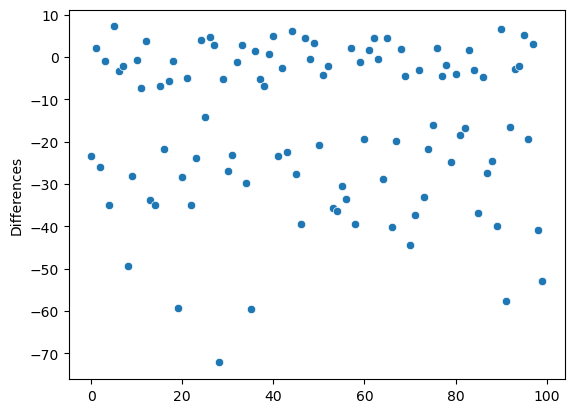

In [42]:
df_train_1 = pd.read_csv('Prva_zadaca.csv')
df_train_1['Differences'] = df_train_1['Merenje 2'] - df_train_1['Merenje 1']
df_train_1

sns.scatterplot(df_train_1['Differences'])
plt.show()

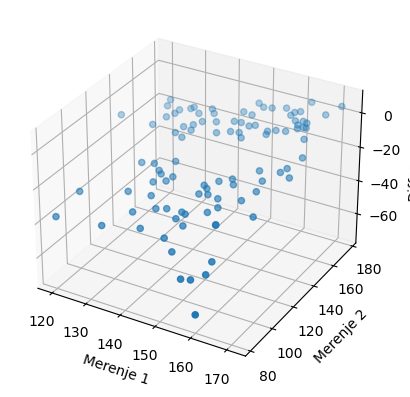

In [43]:
fig = plt.figure()
ax = plt.axes(projection='3d')

z = df_train_1['Differences']
y = df_train_1['Merenje 2']
x = df_train_1['Merenje 1']

ax.set_xlabel('Merenje 1')
ax.set_ylabel('Merenje 2')
ax.set_zlabel('Differences')

ax.scatter(x,y,z)
plt.show()

### Using 'Merenje 1' and 'Merenje 2' as X, and 'Differencies' as y

In [44]:
X = np.array(df_train_1[['Merenje 1', 'Merenje 2']])
y = np.array(df_train_1['Differences'])

linear_model= LinearRegression().fit(X, y)

predicted_differences = linear_model.predict(X)

classification_based_on_linear_reg_model = []
count_positive = 0
count_negative = 0
for diff in predicted_differences:
    if diff < - 20:
        classification_based_on_linear_reg_model.append(1)
        count_positive +=1
    else:
        classification_based_on_linear_reg_model.append(0)
        count_negative +=1
        
print(f'It is possible that {count_positive} people took medicine and {count_negative} did not took medicine.')

It is possible that 41 people took medicine and 59 did not took medicine.


In [45]:
r_sq = linear_model.score(df_train_1[['Merenje 1', 'Merenje 2']],predicted_differences)
print(f'r^2 = {r_sq}')

r^2 = 1.0


C:\Users\Simona\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Here the R^2 is one, which is practiclly impossible, this model shows bias and it is because we used the 'Differences' column in this model that we got from column 'Merenje 1' and 'Merenje 2'.

### Using 'Average pressure' as X, and 'Differencies' as y

r^2 =  0.44204151573289485
----------
The intercept is:  -129.705
The coefficient is:  [0.805]
Differences = 0.805*Average pressure + -129.705
----------
r-sq =  0.44204151573289485
----------
----------
There is not a pattern in the residual plot.
However, the model is not appropriate because of the low value of r^2 and it is a matter of disscusion.
----------


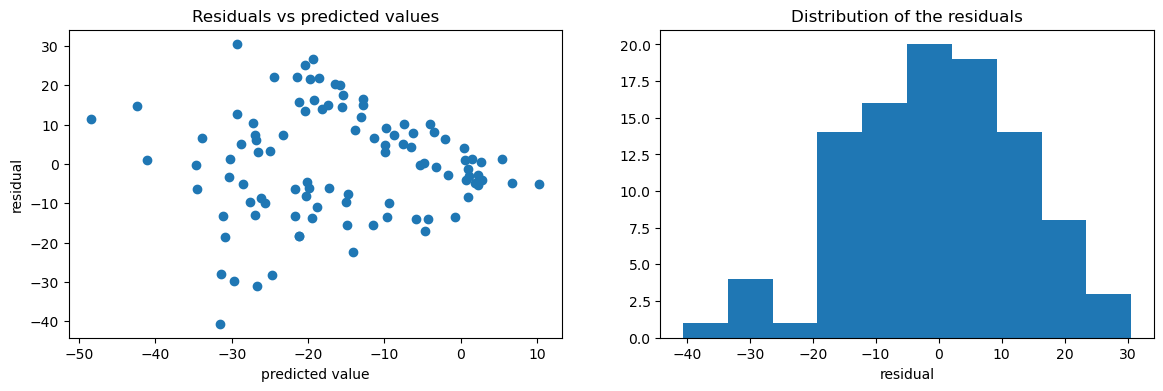

In [46]:
df = pd.read_csv('Prva_zadaca.csv')
df['Differences'] = df['Merenje 2'] - df['Merenje 1']
df['Average pressure'] = (df['Merenje 1'] + df['Merenje 2']) / 2

X = np.array(df['Average pressure']).reshape(-1, 1)
y = np.array(df['Differences'])

lin_model = LinearRegression().fit(X, y)

print('r^2 = ', lin_model.score(X, y))

w0 = np.round(lin_model.intercept_, 3)
w1 = np.round(lin_model.coef_, 3)
print("----------")
print('The intercept is: ', w0)
print('The coefficient is: ', w1)
print(f'Differences = {w1[0]}*Average pressure + {w0}')

print("----------")
# Evaluating the model
r_sq = lin_model.score(X, y)
print('r-sq = ', r_sq)
print("----------")

# Residuals
pred = lin_model.predict(X)
resid = y - pred

# Residual plot and the distribution of the residuals
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.scatter(pred, resid)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residuals vs predicted values')

plt.subplot(1, 2, 2)
plt.hist(resid)
plt.xlabel('residual')
plt.title('Distribution of the residuals')

print("----------")
print('There is not a pattern in the residual plot.')
print('However, the model is not appropriate because of the low value of r^2 and it is a matter of disscusion.')
print("----------")

#sns.scatterplot(data=df, x='Average pressure', y='Differences', hue='Primil lek ili ne')
#plt.show()

### Using this model onto the sample data from 'Vtora_zadaca'

r^2 =  0.44204151573289485
----------
The intercept is:  -129.705
The coefficient is:  [0.805]
Differences = 0.805*Average pressure + -129.705
----------
r-sq =  0.44204151573289485
----------
-------------------


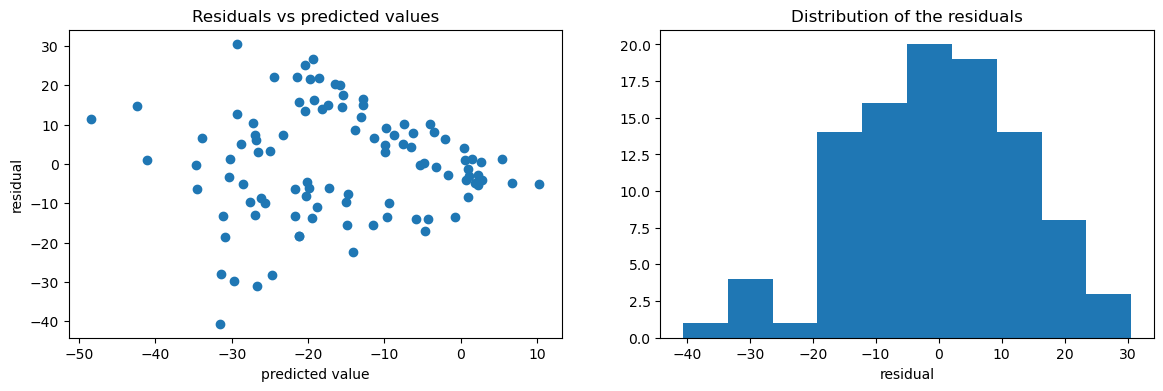

In [47]:
df_2 = pd.read_csv('Vtora_zadaca.csv')

df_2['Differences'] = df_2['Merenje 2'] - df_2['Merenje 1']
df_2['Average pressure'] = (df_2['Merenje 1'] + df_2['Merenje 2']) / 2

X = np.array(df['Average pressure']).reshape(-1, 1)
y = np.array(df['Differences'])

print('r^2 = ', lin_model.score(X, y))

w0 = np.round(lin_model.intercept_, 3)
w1 = np.round(lin_model.coef_, 3)
print("----------")
print('The intercept is: ', w0)
print('The coefficient is: ', w1)
print(f'Differences = {w1[0]}*Average pressure + {w0}')

print("----------")
# Evaluating the model
r_sq = lin_model.score(X, y)
print('r-sq = ', r_sq)
print("----------")

# Residuals ans stuff
pred = lin_model.predict(X)
resid = y - pred

# Residual plot and the distribution of the residuals
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.scatter(pred, resid)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residuals vs predicted values')

plt.subplot(1, 2, 2)
plt.hist(resid)
plt.xlabel('residual')
plt.title('Distribution of the residuals')

print('-------------------')


Using new columns we see that this model is not as biased as the first one. And it relatively gives a nice r^2 score.To impove the r^2 score we should use more varibales, in fact we should use the Multiple Linear Regression.

### Testing different linear regressions

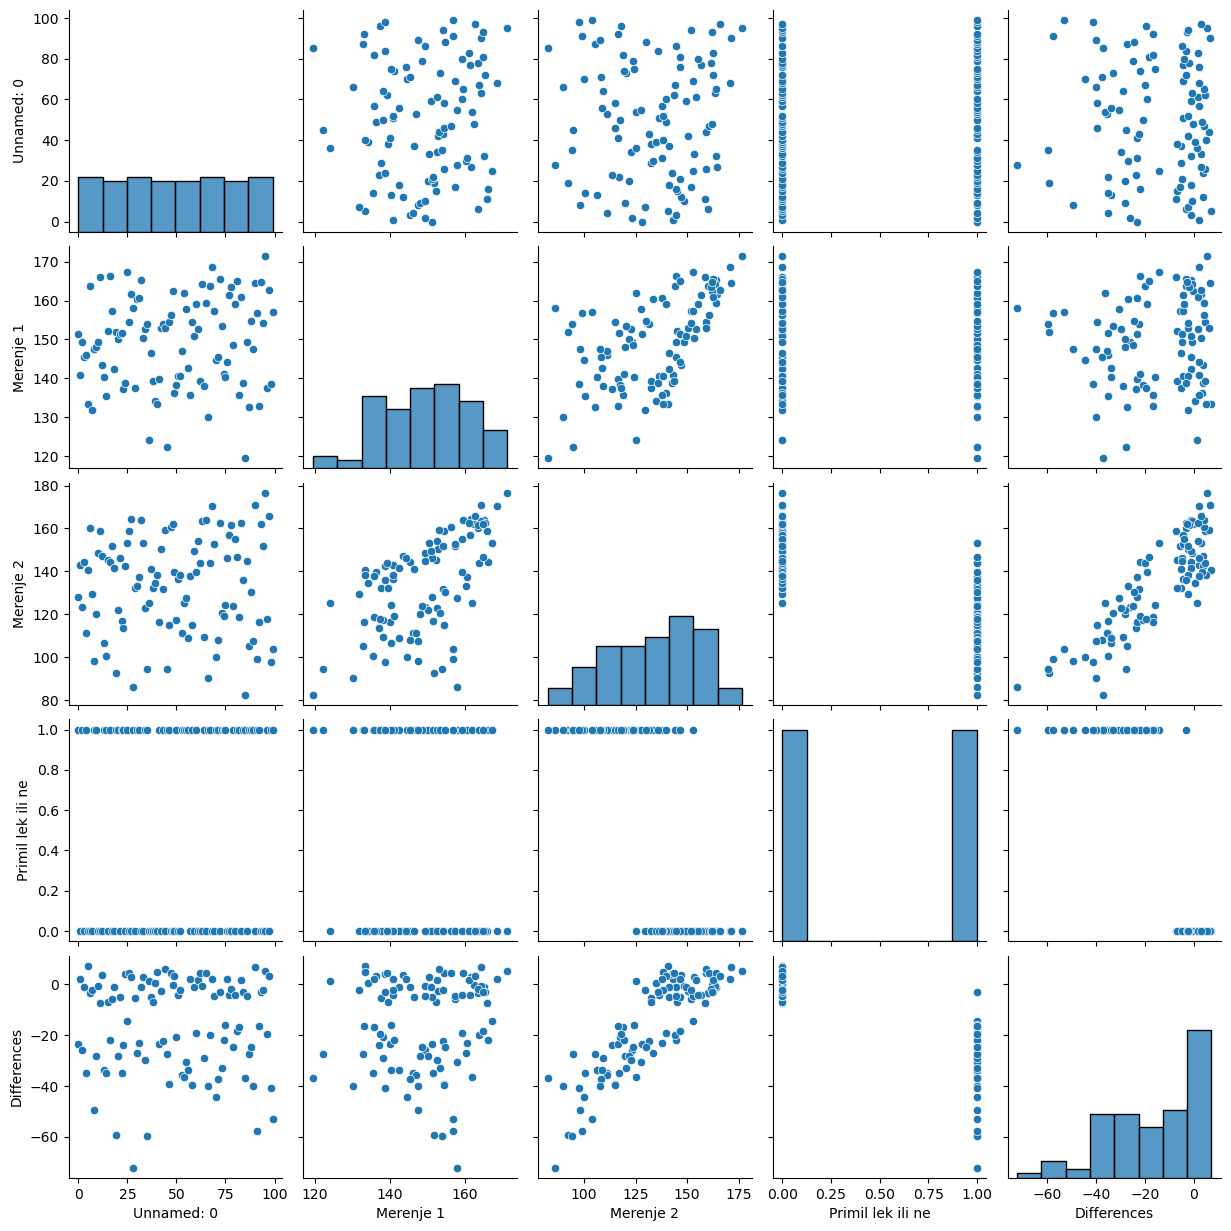

In [48]:
df_train_1 = pd.read_csv('Prva_zadaca.csv')
df_train_1['Differences'] = df_train_1['Merenje 2'] - df_train_1['Merenje 1']

sns.pairplot(data=df_train_1)
plt.show()

----------
r-sq =  0.7298606012069613
----------
There is a pattern in the residual plot
The model is not appropriate
----------


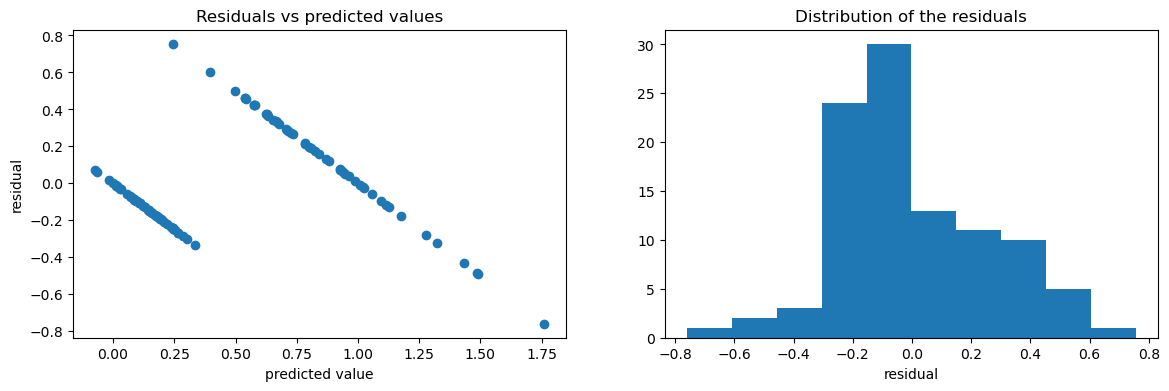

In [49]:
# Building the model
X = df_train_1[['Merenje 2', 'Differences']] 
y = df_train_1[['Primil lek ili ne']] # DataFrame with a single column

multi_model = LinearRegression()
multi_model.fit(X, y)

w0 = np.round(multi_model.intercept_, 3)
w1 = np.round(multi_model.coef_, 3)
print("----------")

# Evaluating the model
r_sq = multi_model.score(X, y)
print('r-sq = ', r_sq)
print("----------")

# Residuals ans stuff
pred = multi_model.predict(X)
resid = y - pred

# Residual plot and the distribution of the residuals
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.scatter(pred, resid)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residuals vs predicted values')

plt.subplot(1, 2, 2)
plt.hist(resid)
plt.xlabel('residual')
plt.title('Distribution of the residuals')

print('There is a pattern in the residual plot')
print('The model is not appropriate')
print("----------")

# We can see a pattern in residuals, thats why we'll try polynomial regression.

In [50]:
import statsmodels.api as sm

# Fist we must add ones to the original dataset
X_sm = sm.add_constant(X)

# Build the model
model = sm.OLS(y, X_sm)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Primil lek ili ne   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     131.0
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           2.70e-28
Time:                        17:20:02   Log-Likelihood:                -7.1383
No. Observations:                 100   AIC:                             20.28
Df Residuals:                      97   BIC:                             28.09
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6923      0.351      1.973      

### Testing different regressions: Non-Linear Model

r-sq =  0.9246372455410476
r =  0.9615805975273459


Text(0.5, 1.0, 'Distribution of the residuals')

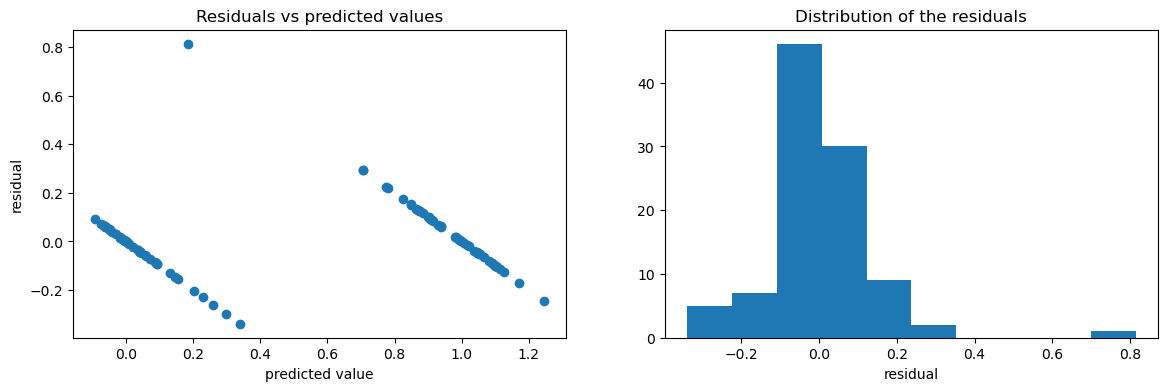

In [51]:
from sklearn.preprocessing import PolynomialFeatures

# Instance the transformer, transform the data
poly_transformer = PolynomialFeatures(degree=4)
poly_transformer.fit(X)
X_trans = poly_transformer.transform(X)

# print("X_transformed = ", X_trans)

# Build the model
quad_model = LinearRegression().fit(X_trans, y)
y_trans_pred = quad_model.predict(X_trans)
resid_trans = y - y_trans_pred

r_sq = quad_model.score(X_trans, y)
print('r-sq = ', r_sq)
print('r = ', np.sqrt(r_sq))

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_trans_pred, resid_trans)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residuals vs predicted values')

plt.subplot(1, 2, 2)
plt.hist(resid_trans)
plt.xlabel('residual')
plt.title('Distribution of the residuals')

# Polynomial model shows better reluts than the linear one, but again, there is a pattern in the residuals. 
# Note: If the more we size up the degree, the better are the results.
# Conclusion: This model is also not a good fit, which confirms that the Logcal Regression is the best model for this case: 

In [52]:
import statsmodels.api as sm

# Fist we must add ones to the original dataset
X_sm = sm.add_constant(X_trans)

# Build the model
model = sm.OLS(y, X_sm)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Primil lek ili ne   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     74.49
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           1.58e-41
Time:                        17:20:03   Log-Likelihood:                 56.693
No. Observations:                 100   AIC:                            -83.39
Df Residuals:                      85   BIC:                            -44.31
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -185.0592    348.750     -0.531      0.5

## Prediction using linear regression ##
Building a linear regression model according to the data in the first part, to predict how much will the blood preassure lower after 6 months if the patient takes medicine
To train, we use the dataset of patients that took a medicine. 



----------
The intercept is:  -11.976
The coefficients are:  [0.868]
Differences = 0.868*Average pressure + -11.976
----------
r-sq =  0.3455738584612331
----------
----------
There r^2 is too low.
The model is not appropriate
----------


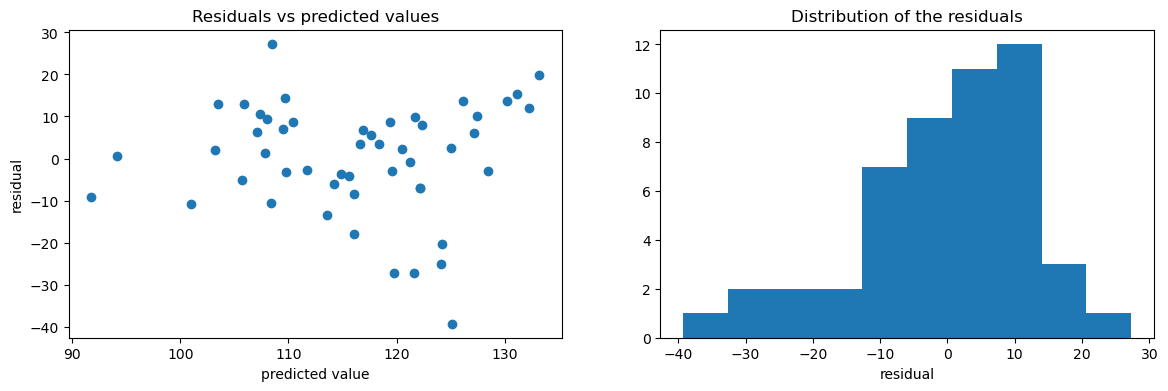

In [53]:
df = pd.read_csv('Prva_zadaca.csv')

df_0 = df[df['Primil lek ili ne']==0]
df_1 = df[df['Primil lek ili ne']==1]

# Building the model
X = df_1[['Merenje 1']]
y = df_1['Merenje 2']

# X = np.array(df_z1_1['Merenje 1']).reshape(-1, 1)
# y = np.array(df_z1_1['Merenje 2'])
             
pred_model = LinearRegression()
pred_model.fit(X, y)

w0 = np.round(pred_model.intercept_, 3)
w1 = np.round(pred_model.coef_, 3)
print("----------")
print('The intercept is: ', w0)
print('The coefficients are: ', w1)
print(f'Differences = {w1[0]}*Average pressure + {w0}')

print("----------")
# Evaluating the model
r_sq = pred_model.score(X, y)
print('r-sq = ', r_sq)
print("----------")

# Residuals ans stuff
pred = pred_model.predict(X)
resid = y - pred

# Residual plot and the distribution of the residuals
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.scatter(pred, resid)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residuals vs predicted values')

plt.subplot(1, 2, 2)
plt.hist(resid)
plt.xlabel('residual')
plt.title('Distribution of the residuals')

print("----------")
print('There r^2 is too low.')
print('The model is not appropriate')
print("----------")

In [54]:
pred = pred_model.predict([[160]])
pred

C:\Users\Simona\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([126.88385072])

## Conclusion

This model of prediction is not very accurate, and definetly is NOT a good fit. However, it could be improved if additional features are included in it, for example age, sex, if the patient is smoker or not, nutrition etc...
